In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def all_conf_matrix(total):
    for i in range(total+1):
        for j in range(total+1-i):
            for k in range(total+1-i-j):
                yield(i,j,k, total-i-j-k)


In [0]:
#list(all_conf_matrix(4))
#TP, FP, FN, TN

In [0]:
total = 4
max(sum(s) for s in all_conf_matrix(total))==total

True

${\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }$

${\displaystyle \mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }$


In [0]:
def TPR(conf_matrix):
    TP,FP,FN,TN = conf_matrix
    tpr = (TP) / (TP+FN)
    return tpr

def TNR(conf_matrix):
    TP,FP,FN,TN = conf_matrix
    tnr = (TN) / (TN+FP)
    return tnr

def b_acc(conf_matrix):
    TP,FP,FN,TN = conf_matrix
    tpr = (TP) / (TP+FN)
    tnr = (TN) / (TN+FP)
    bacc = (tpr + tnr) / 2
    return bacc

In [0]:
def accuracy(conf_matrix):
    TP,FP,FN,TN = conf_matrix
    acc = (TP+TN) / (TP+TN+FP+FN)
    return acc

def recall(conf_matrix):
    TP,FP,FN,TN = conf_matrix
    rec = (TP) / (TP+FN)
    return rec

def precision(conf_matrix):
    TP,FP,FN,TN = conf_matrix
    pre = (TP) / (TP+FP)
    return pre

def f1_score(conf_matrix):
    TP,FP,FN,TN = conf_matrix
    f1 = (2*TP) / (2*TP + FP + FN)
    return f1

#def f1_score_(recall, precision):
#    R, P = recall, precision
#    f1 = (2*R*P) / (R+P)
#    return f1

def matthewscc(conf_matrix):
    TP,FP,FN,TN = conf_matrix
    mcc = (TP*TN - FP*FN) / np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    return mcc

In [0]:
def create_df_metrics(total):
    data  = all_conf_matrix(total)
    dfm = pd.DataFrame(data, columns=['TP','FP','FN','TN'])

    TP = dfm['TP']
    FP = dfm['FP']
    FN = dfm['FN']
    TN = dfm['TN']

    dfm['ACCURACY']  = accuracy ((TP,FP,FN,TN))
    dfm['BAL_ACC']   = b_acc    ((TP,FP,FN,TN))
    dfm['RECALL']    = recall   ((TP,FP,FN,TN))
    dfm['PRECISION'] = precision((TP,FP,FN,TN))
    dfm['F1_SCORE'] = f1_score((TP,FP,FN,TN))
    dfm['MCC']       = matthewscc((TP,FP,FN,TN))

    return dfm


In [0]:
total = 4
df1 = create_df_metrics(total)
df1.shape

(35, 10)

In [0]:
df1

,TP,FP,FN,TN,ACCURACY,BAL_ACC,RECALL,PRECISION,F1_SCORE,MCC
0,0,0,0,4,1.00,NaN,NaN,NaN,NaN,NaN
1,0,0,1,3,0.75,0.500000,0.000000,NaN,0.000000,NaN
2,0,0,2,2,0.50,0.500000,0.000000,NaN,0.000000,NaN
3,0,0,3,1,0.25,0.500000,0.000000,NaN,0.000000,NaN
4,0,0,4,0,0.00,NaN,0.000000,NaN,0.000000,NaN
5,0,1,0,3,0.75,NaN,NaN,0.000000,0.000000,NaN
6,0,1,1,2,0.50,0.333333,0.000000,0.000000,0.000000,-0.333333
7,0,1,2,1,0.25,0.250000,0.000000,0.000000,0.000000,-0.577350
8,0,1,3,0,0.00,0.000000,0.000000,0.000000,0.000000,-1.000000
9,0,2,0,2,0.50,NaN,NaN,0.000000,0.000000,NaN


In [0]:
df1_corr = df1.corr()
df1_corr

,TP,FP,FN,TN,ACCURACY,BAL_ACC,RECALL,PRECISION,F1_SCORE,MCC
TP,1.000000,-3.333333e-01,-3.333333e-01,-3.333333e-01,0.577350,0.585045,7.872333e-01,7.872333e-01,0.899950,0.735733
FP,-0.333333,1.000000e+00,-3.333333e-01,-3.333333e-01,-0.577350,-0.585045,1.896975e-17,-7.872333e-01,-0.422603,-0.735733
FN,-0.333333,-3.333333e-01,1.000000e+00,-3.333333e-01,-0.577350,-0.585045,-7.872333e-01,-4.742437e-18,-0.422603,-0.735733
TN,-0.333333,-3.333333e-01,-3.333333e-01,1.000000e+00,0.577350,0.585045,5.690925e-17,5.216681e-17,-0.061244,0.735733
ACCURACY,0.577350,-5.773503e-01,-5.773503e-01,5.773503e-01,1.000000,0.914702,6.980375e-01,6.980375e-01,0.751085,0.973283
BAL_ACC,0.585045,-5.850455e-01,-5.850455e-01,5.850455e-01,0.914702,1.000000,7.071068e-01,8.338959e-01,0.785226,0.996972
RECALL,0.787233,1.896975e-17,-7.872333e-01,5.690925e-17,0.698038,0.707107,1.000000e+00,5.815232e-01,0.900750,0.858249
PRECISION,0.787233,-7.872333e-01,-4.742437e-18,5.216681e-17,0.698038,0.833896,5.815232e-01,1.000000e+00,0.900750,0.858249
F1_SCORE,0.899950,-4.226030e-01,-4.226030e-01,-6.124369e-02,0.751085,0.785226,9.007502e-01,9.007502e-01,1.000000,0.907334
MCC,0.735733,-7.357327e-01,-7.357327e-01,7.357327e-01,0.973283,0.996972,8.582487e-01,8.582487e-01,0.907334,1.000000


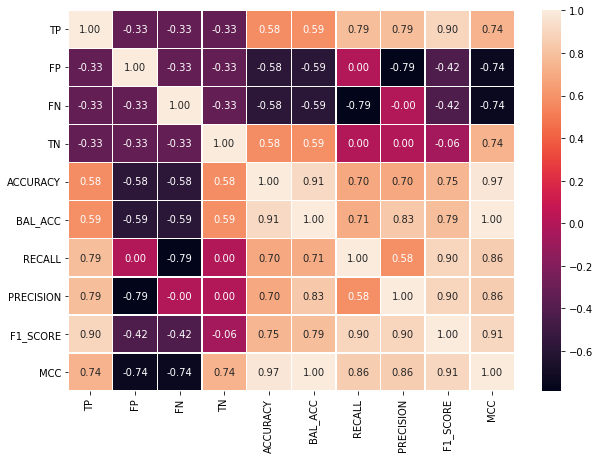

In [0]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df1_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax);

In [0]:
Totals = [4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 
          100, 125, 150, 175, 200, 250, 300]

In [0]:
lenTotals = len(Totals)

c_acc_rec = np.zeros(len(Totals))
c_acc_pre = np.zeros(len(Totals))
c_acc_f1  = np.zeros(len(Totals))
c_acc_bacc  = np.zeros(len(Totals))
c_acc_hacc  = np.zeros(len(Totals))
c_acc_mcc = np.zeros(len(Totals))

In [0]:
#cols = {'Totals', 'c_acc_rec', 'c_acc_pre', 'c_acc_f1', 'c_acc_mcc'}
#dfCorrAcc = pd.DataFrame(np.zeros(), columns)


In [0]:
print('Total\tShape')
for i,total in enumerate(Totals):
    dfm = create_df_metrics(total)
    ####
    #dfm = dfm[(dfm['TN']>=int(.01*total)) & (dfm['TN']<=int(.20*total))
    #dfm = dfm[(((dfm['FP']>=int(.80*total)) | (dfm['FN']<=int(.80*total))))
    dfm[(dfm['TN']>=int(.95*total)) & (dfm['TN']<=int(.99*total)) #&
    #dfm[(dfm['TP']>=int(.01*total)) & (dfm['TP']<=int(.05*total)) #&
          #dfm[(dfm['TP']>=int(.90*total)) & (dfm['TP']<=int(.99*total)) #&
          #(((dfm['FP']<=int(.05*total)) & (dfm['FN']<=int(.05*total))))
          #(((dfm['FP']>=int(.80*total)) | (dfm['FN']<=int(.80*total))))
          ]
    ####
    print(total, '\t', dfm.shape)
    dfm_corr = dfm.corr()

    c_acc_rec[i]  = dfm_corr['ACCURACY']['RECALL']
    c_acc_pre[i]  = dfm_corr['ACCURACY']['PRECISION']
    c_acc_f1[i]   = dfm_corr['ACCURACY']['F1_SCORE']
    c_acc_bacc[i] = dfm_corr['ACCURACY']['BAL_ACC']    
    c_acc_mcc[i]  = dfm_corr['ACCURACY']['MCC']

    #c_acc_rec[i]  = dfm_corr['ACCURACY']['RECALL']
    #c_acc_pre[i]  = dfm_corr['ACCURACY']['PRECISION']
    #c_acc_f1[i]   = dfm_corr['ACCURACY']['F1_SCORE']
    #c_acc_bacc[i] = dfm_corr['ACCURACY']['BAL_ACC']    
    #c_acc_mcc[i]  = dfm_corr['ACCURACY']['MCC']

    #c_acc_rec[i]  = dfm_corr['BAL_ACC']['RECALL']
    #c_acc_pre[i]  = dfm_corr['BAL_ACC']['PRECISION']
    #c_acc_f1[i]   = dfm_corr['BAL_ACC']['F1_SCORE']
    #c_acc_bacc[i] = dfm_corr['BAL_ACC']['ACCURACY']    
    #c_acc_mcc[i]  = dfm_corr['BAL_ACC']['MCC']

Total	Shape
4 	 (35, 10)
5 	 (56, 10)
6 	 (84, 10)
7 	 (120, 10)
8 	 (165, 10)
9 	 (220, 10)
10 	 (286, 10)
20 	 (1771, 10)
30 	 (5456, 10)
40 	 (12341, 10)
50 	 (23426, 10)
60 	 (39711, 10)
70 	 (62196, 10)
80 	 (91881, 10)
90 	 (129766, 10)
100 	 (176851, 10)
125 	 (341376, 10)
150 	 (585276, 10)
175 	 (924176, 10)
200 	 (1373701, 10)
250 	 (2667126, 10)
300 	 (4590551, 10)


In [0]:
df_acc = pd.DataFrame({'Totals':Totals,
                       'c_acc_rec':c_acc_rec,
                       'c_acc_pre':c_acc_pre,
                       'c_acc_f1':c_acc_f1,
                       'c_acc_bacc':c_acc_bacc,
                       'c_acc_mcc':c_acc_mcc})
df_acc

,Totals,c_acc_rec,c_acc_pre,c_acc_f1,c_acc_bacc,c_acc_mcc
0,4,0.698038,0.698038,0.751085,0.914702,0.973283
1,5,0.673948,0.673948,0.741284,0.898202,0.958428
2,6,0.658780,0.658780,0.737740,0.888449,0.946792
3,7,0.648803,0.648803,0.737155,0.882580,0.938001
4,8,0.642045,0.642045,0.737995,0.879071,0.931409
5,9,0.637375,0.637375,0.739502,0.877051,0.926452
6,10,0.634109,0.634109,0.741289,0.875996,0.922702
7,20,0.627527,0.627527,0.756169,0.880718,0.911293
8,30,0.629921,0.629921,0.763420,0.887544,0.911153
9,40,0.632376,0.632376,0.767322,0.892364,0.912198


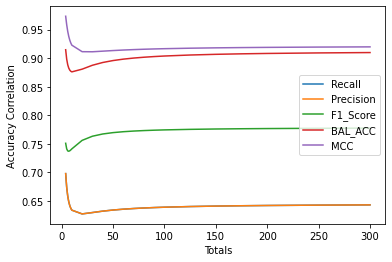

In [0]:
sns.lineplot(x='Totals', y='c_acc_rec', data=df_acc);
sns.lineplot(x='Totals', y='c_acc_pre', data=df_acc);
sns.lineplot(x='Totals', y='c_acc_f1', data=df_acc);
sns.lineplot(x='Totals', y='c_acc_bacc', data=df_acc);
sns.lineplot(x='Totals', y='c_acc_mcc', data=df_acc);
plt.ylabel('Accuracy Correlation');
plt.legend(labels=['Recall','Precision','F1_Score','BAL_ACC','MCC']);

In [0]:
dfm[['ACCURACY', 'BAL_ACC', 'F1_SCORE', 'MCC']].describe()

,ACCURACY,BAL_ACC,F1_SCORE,MCC
count,4.590551e+06,4.589949e+06,4.590550e+06,4.589351e+06
mean,5.000000e-01,5.000000e-01,4.541350e-01,1.454023e-15
std,2.250926e-01,2.061923e-01,2.613674e-01,4.026583e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,3.266667e-01,3.520674e-01,2.339623e-01,-2.913730e-01
50%,5.000000e-01,5.000000e-01,4.527221e-01,0.000000e+00
75%,6.733333e-01,6.479326e-01,6.666667e-01,2.913730e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


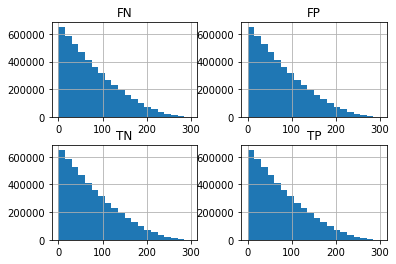

In [0]:
# histograma para o ultimo caso: total=300
dfm[['TP', 'TN', 'FP', 'FN']].hist(bins=20);

In [0]:
dfm.corr()

,TP,FP,FN,TN,ACCURACY,BAL_ACC,RECALL,PRECISION,F1_SCORE,MCC
TP,1.000000,-3.333333e-01,-3.333333e-01,-3.333333e-01,0.577350,0.525287,7.428469e-01,7.428469e-01,0.899044,0.531071
FP,-0.333333,1.000000e+00,-3.333333e-01,-3.333333e-01,-0.577350,-0.525287,2.685529e-14,-7.428469e-01,-0.448944,-0.531071
FN,-0.333333,-3.333333e-01,1.000000e+00,-3.333333e-01,-0.577350,-0.525287,-7.428469e-01,3.032902e-14,-0.448944,-0.531071
TN,-0.333333,-3.333333e-01,-3.333333e-01,1.000000e+00,0.577350,0.525287,2.449259e-14,3.034663e-14,-0.001155,0.531071
ACCURACY,0.577350,-5.773503e-01,-5.773503e-01,5.773503e-01,1.000000,0.909759,6.433246e-01,6.433246e-01,0.777595,0.919711
BAL_ACC,0.525287,-5.252870e-01,-5.252870e-01,5.252870e-01,0.909759,1.000000,7.071068e-01,6.741651e-01,0.765363,0.987428
RECALL,0.742847,2.685529e-14,-7.428469e-01,2.449259e-14,0.643325,0.707107,1.000000e+00,4.766919e-01,0.832697,0.698351
PRECISION,0.742847,-7.428469e-01,3.032902e-14,3.034663e-14,0.643325,0.674165,4.766919e-01,1.000000e+00,0.832697,0.698351
F1_SCORE,0.899044,-4.489445e-01,-4.489445e-01,-1.154752e-03,0.777595,0.765363,8.326968e-01,8.326968e-01,1.000000,0.775098
MCC,0.531071,-5.310715e-01,-5.310715e-01,5.310715e-01,0.919711,0.987428,6.983508e-01,6.983508e-01,0.775098,1.000000


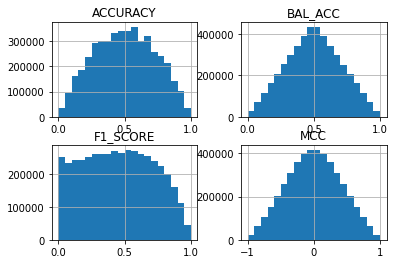

In [0]:
#plt.plot(dfm['ACCURACY'],'b.');
dfm[['ACCURACY', 'BAL_ACC', 'F1_SCORE', 'MCC']].hist(bins=20);

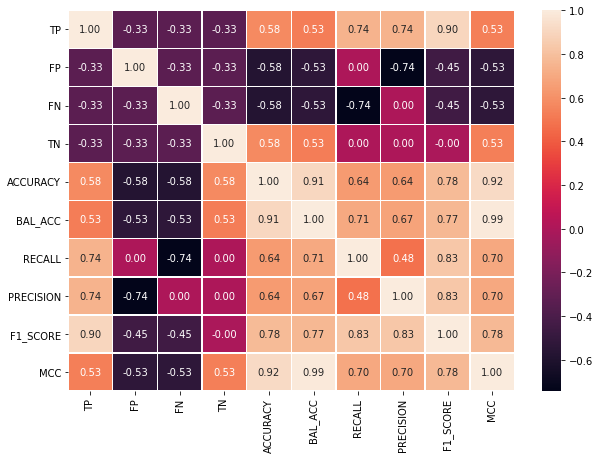

In [0]:
dfm_corr = dfm.corr()
dfm_corr
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(dfm_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax);

---
---
---

In [0]:
#############################

total = 200
df1 = create_df_metrics(total)
df1.shape

(1373701, 11)

In [0]:
#(df1['FP']>=int(.02*total)) & (df1['FN']<=int(.02*total)) &
df2 = df1[(df1['TP']>=int(.95*total))  &
          (((df1['FP']<=int(.05*total)) & (df1['FN']<=int(.05*total))))
          ]
df2.tail(20)

,TP,FP,FN,TN,ACCURACY,BAL_ACC,HARM_ACC,RECALL,PRECISION,F1_SCORE,MCC
1373681,197,0,0,3,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1373682,197,0,1,2,0.995,0.997475,0.997468,0.994949,1.000000,0.997468,0.814432
1373683,197,0,2,1,0.990,0.994975,0.994949,0.989950,1.000000,0.994949,0.574442
1373684,197,0,3,0,0.985,NaN,NaN,0.985000,1.000000,0.992443,NaN
1373685,197,1,0,2,0.995,0.833333,0.800000,1.000000,0.994949,0.997468,0.814432
1373686,197,1,1,1,0.990,0.747475,0.665541,0.994949,0.994949,0.994949,0.494949
1373687,197,1,2,0,0.985,0.494975,0.000000,0.989950,0.994949,0.992443,-0.007125
1373688,197,2,0,1,0.990,0.666667,0.500000,1.000000,0.989950,0.994949,0.574442
1373689,197,2,1,0,0.985,0.497475,0.000000,0.994949,0.989950,0.992443,-0.007125
1373690,197,3,0,0,0.985,0.500000,0.000000,1.000000,0.985000,0.992443,NaN


In [0]:
df2.describe()

,TP,FP,FN,TN,ACCURACY,BAL_ACC,HARM_ACC,RECALL,PRECISION,F1_SCORE,MCC
count,286.000000,286.000000,286.000000,286.000000,286.000000,275.000000,275.000000,286.000000,286.000000,286.000000,265.000000
mean,192.500000,2.500000,2.500000,2.500000,0.975000,0.743880,0.578426,0.987269,0.987269,0.987179,0.479216
std,2.295304,2.295304,2.295304,2.295304,0.013252,0.180784,0.360063,0.011594,0.011594,0.006796,0.307985
min,190.000000,0.000000,0.000000,0.000000,0.950000,0.477387,0.000000,0.950000,0.950000,0.974359,-0.025641
25%,191.000000,1.000000,1.000000,1.000000,0.965000,0.582045,0.285609,0.979592,0.979592,0.982005,0.243711
50%,192.000000,2.000000,2.000000,2.000000,0.975000,0.744792,0.664336,0.989691,0.989691,0.987179,0.496217
75%,194.000000,4.000000,4.000000,4.000000,0.985000,0.907646,0.901560,0.994943,0.994943,0.992327,0.722790
max,200.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df2_corr = df2.corr()
df2_corr

,TP,FP,FN,TN,ACCURACY,BAL_ACC,HARM_ACC,RECALL,PRECISION,F1_SCORE,MCC
TP,1.000000,-0.333333,-0.333333,-0.333333,0.577350,0.010949,-0.030969,0.340169,0.340169,0.586183,0.076299
FP,-0.333333,1.000000,-0.333333,-0.333333,-0.577350,-0.719536,-0.676656,0.329867,-0.999903,-0.577300,-0.483512
FN,-0.333333,-0.333333,1.000000,-0.333333,-0.577350,-0.030733,-0.041122,-0.999903,0.329867,-0.577300,-0.483512
TN,-0.333333,-0.333333,-0.333333,1.000000,0.577350,0.738544,0.745919,0.329867,0.329867,0.568417,0.859501
ACCURACY,0.577350,-0.577350,-0.577350,0.577350,1.000000,0.651218,0.622617,0.580268,0.580268,0.999913,0.807595
BAL_ACC,0.010949,-0.719536,-0.030733,0.738544,0.651218,1.000000,0.980624,0.030735,0.719765,0.644813,0.867747
HARM_ACC,-0.030969,-0.676656,-0.041122,0.745919,0.622617,0.980624,1.000000,0.040526,0.675344,0.615357,0.889169
RECALL,0.340169,0.329867,-0.999903,0.329867,0.580268,0.030735,0.040526,1.000000,-0.326308,0.580319,0.483202
PRECISION,0.340169,-0.999903,0.329867,0.329867,0.580268,0.719765,0.675344,-0.326308,1.000000,0.580319,0.483202
F1_SCORE,0.586183,-0.577300,-0.577300,0.568417,0.999913,0.644813,0.615357,0.580319,0.580319,1.000000,0.800777


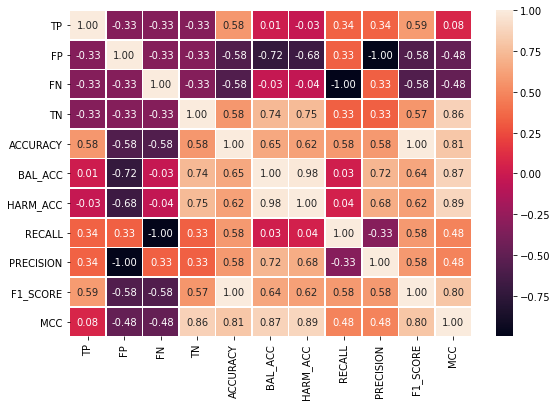

In [0]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df2_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax);

In [0]:
df1.shape, df2.shape